In [1]:
%matplotlib inline
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

cumulative  = Table.read('../data/koi-cumulative.tbl', format='ascii')
koi_list    = np.array([int(float(x.split("K")[1].strip("0"))) for x in cumulative['kepoi_name']])
kic_list    = np.array([x for x in cumulative['kepid']])
kepler_list = ["" for x in range(len(cumulative))]

ful_star   = Table.read("../data/Fulton2018_stellarradii_ajaae828t2_mrt.txt", format='ascii')
ful_planet = Table.read("../data/Fulton2018_planetradii_ajaae828t3_mrt.txt", format='ascii')

In [2]:
ful_planet['KOIN'] = np.array([int(float(x.split("K")[1].lstrip("0"))) for x in ful_planet['KOI']])
ful_star['KOIN'] = np.array([int(float(x.split("K")[1].lstrip("0"))) for x in ful_star['KOI']])

In [3]:
ful_planet_df = ful_planet.to_pandas()
ful_star_df = ful_star.to_pandas()

In [4]:
mps = pd.merge(ful_planet_df,ful_star_df, how = 'left', left_on = 'KOIN', right_on = 'KOIN')
mps.columns

Index(['KOI_x', 'P', 'E_P', 'e_P', 'Rp/R*', 'E_Rp/R*', 'e_Rp/R*', 'Rp', 'E_Rp',
       'e_Rp', 'a', 'E_a', 'e_a', 'Sinc', 'E_Sinc', 'e_Sinc', 'KOIN', 'KOI_y',
       'Teff', 'E_Teff', 'e_Teff', '[Fe/H]', 'E_[Fe/H]', 'e_[Fe/H]', 'Ksmag',
       'e_Ksmag', 'plx', 'e_plx', 'R', 'E_R', 'e_R', 'Miso', 'E_Miso',
       'e_Miso', 'Riso', 'E_Riso', 'e_Riso', 'rhoiso', 'E_rhoiso', 'e_rhoiso',
       'logAiso', 'E_logAiso', 'e_logAiso', 'plxspec', 'E_plxspec',
       'e_plxspec', 'r8', 'RCF'],
      dtype='object')

(-3, 4)

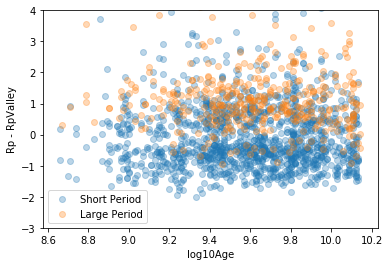

In [36]:
def Rp_valley(P):
    return 10**(-0.09*np.log10(P) + .37)

mps["Rp_valley"] = Rp_valley(mps['P'])
mps['R_diff'] = mps["Rp"] - mps["Rp_valley"]

short_period = mps["P"] < 30
long_period = mps["P"] > 30
plt.scatter(mps["logAiso"][short_period],mps["R_diff"][short_period], alpha = 0.3, label = "Short Period")
plt.scatter(mps["logAiso"][long_period],mps["R_diff"][long_period], alpha = 0.3, label = "Large Period")
plt.legend()
plt.xlabel("log10Age")
plt.ylabel("Rp - RpValley")
plt.ylim(-3,4)

In [16]:
Rp_valley(mps['P'])

0       2.160964
1       2.183222
2       2.284194
3       2.110425
4       2.313096
          ...   
1896    1.381613
1897    1.348481
1898    1.326411
1899    1.376488
1900    1.636342
Name: P, Length: 1901, dtype: float64

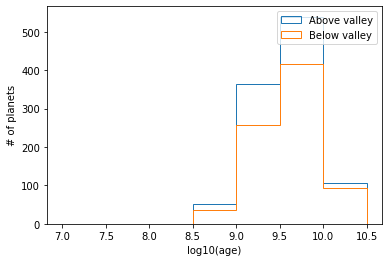

In [24]:
cond1 = mps['R_diff'] > 0
cond2 = mps['R_diff'] < 0
p_above_rv = mps['logAiso'][cond1]
p_below_rv = mps['logAiso'][cond2]

_bins = np.arange(7,11,0.5)
hist_below, bin_edges = np.histogram(p_below_rv, bins = _bins, density =False)
hist_above, bin_edges = np.histogram(p_above_rv,bins = _bins, density =False)
hist_all, bin_edges = np.histogram(mps['logAiso'], bins = _bins, density=False)

plt.hist(p_above_rv, bins=_bins, density=False, histtype='step', label='Above valley')
plt.hist(p_below_rv, bins=_bins, density=False, histtype='step', label='Below valley')
#plt.hist(mps['logAiso'], bins=_bins, density=False, histtype='step', label='All')
plt.xlabel('log10(age)')
plt.ylabel('# of planets')
plt.legend()

#fraction of planets below radius valley/planets above radius valley
plt.plot(bin_edges[1:], hist_below/hist_above, label = 'Below/Above')
#fraction of planets below radius valley/all planets
plt.plot(bin_edges[1:], hist_below/hist_all,label = 'Below/All')
#fraction of planets above radius valley/all planets
plt.plot(bin_edges[1:], hist_above/hist_all,label = 'Above/All')
plt.legend()
plt.xlabel("Log10(Age)", size = 11)
plt.ylabel("Fraction", size = 11)

/Users/Angeli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/Angeli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/Angeli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'Fraction')

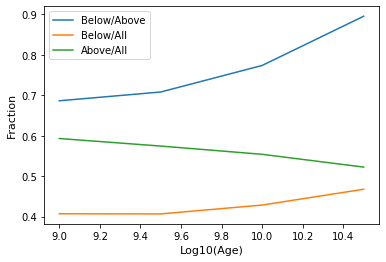

In [9]:
#fraction of planets below radius valley/planets above radius valley
plt.plot(bin_edges[1:], hist_below/hist_above, label = 'Below/Above')
#fraction of planets below radius valley/all planets
plt.plot(bin_edges[1:], hist_below/hist_all,label = 'Below/All')
#fraction of planets above radius valley/all planets
plt.plot(bin_edges[1:], hist_above/hist_all, label = 'Above/All')
plt.legend()
plt.xlabel("Log10(Age)", size = 11)
plt.ylabel("Fraction", size = 11)

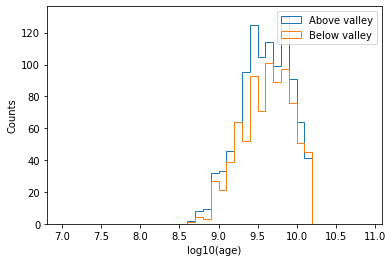

In [29]:
mask = mps['R_diff'] > 0
ages_above_valley = mps['logAiso'][mask]
ages_below_valley = mps['logAiso'][~mask]
_bins=np.arange(7,11,0.1) #We will bin the stellar ages between log10(age) = 7 and log10(age) = 11 in steps of 0.1
hist0, bin_edges = np.histogram(ages_above_valley, bins=_bins, density=False)
hist1, bin_edges = np.histogram(ages_below_valley, bins=_bins, density=False)
plt.hist(ages_above_valley, bins=_bins, density=False, histtype='step', label='Above valley')
plt.hist(ages_below_valley, bins=_bins, density=False, histtype='step', label='Below valley')
plt.xlabel('log10(age)')
plt.ylabel('Counts')
plt.legend()
# For Angeli: plot the ratio of the planets below/above the valley as a function of age. 
# Hint, you will use the results of np.histogram to do this.

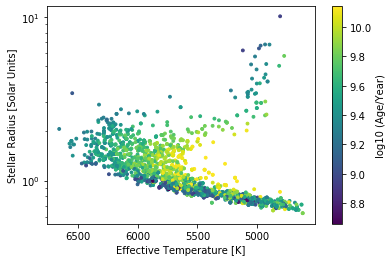

In [26]:
plt.scatter(mps['Teff'],mps['Riso'], s = 8, c = mps['logAiso'])
cbar = plt.colorbar()
cbar.set_label('log10 (Age/Year)')
plt.xlabel('Effective Temperature [K]')
plt.ylabel('Stellar Radius [Solar Units]')
plt.semilogy()
plt.gca().invert_xaxis()

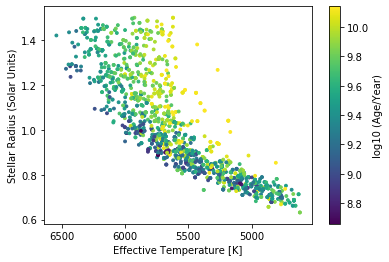

In [12]:
arg = mps['Riso'] < 1.5
plt.scatter(mps['Teff'][arg],mps['Riso'][arg], s = 8, c = mps['logAiso'][arg])
cbar = plt.colorbar()
cbar.set_label('log10 (Age/Year)')
plt.xlabel('Effective Temperature [K]')
plt.ylabel('Stellar Radius (Solar Units)')
plt.gca().invert_xaxis()